In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df1=pd.read_csv("/content/Titanic-Dataset.csv")
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [56]:
df1.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

First we will remove those columns who have no relevance if the passenger dies or survives.


In [57]:
df2=df1.drop(["PassengerId","Name","Ticket","Fare","Embarked"],axis=1)

In [58]:
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin
0,0,3,male,22.0,1,0,NaN
1,1,1,female,38.0,1,0,C85
2,1,3,female,26.0,0,0,NaN
3,1,1,female,35.0,1,0,C123
4,0,3,male,35.0,0,0,NaN
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,NaN
887,1,1,female,19.0,0,0,B42
888,0,3,female,NaN,1,2,NaN
889,1,1,male,26.0,0,0,C148


Let us check what is the status of each variable that we are including.

In [59]:
df2.Pclass.isnull().sum()

0

In [60]:
df2.Sex.isnull().sum()

0

In [61]:
df2.Age.isnull().sum()

177

In [62]:
df2.SibSp.isnull().sum()

0

In [63]:
df2.Parch.isnull().sum()

0

In [ ]:
df2.Cabin.isnull().sum()

687

In [ ]:
df2.Embarked.isnull().sum()

2

In [ ]:
df2.Survived.isnull().sum()

0

<Axes: >

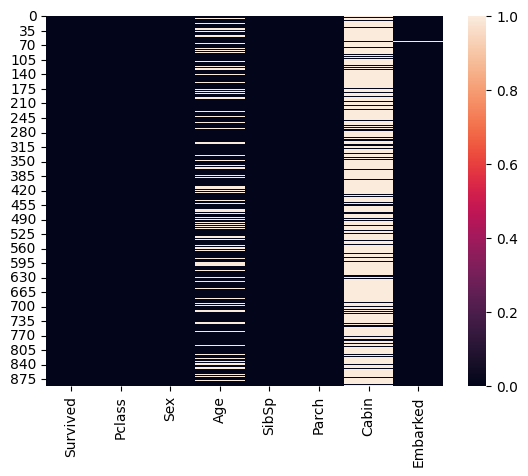

In [33]:
#Just to visualise
sns.heatmap(df2.isna())

We can see that the variable Cabin is empty most of the time, hence we remove it from our variables.

In [69]:
df3=df2.drop("Cabin" , axis=1)
df3

,Survived,Pclass,Sex,Age,SibSp,Parch,sex
0,0,3,male,22.0,1,0,0
1,1,1,female,38.0,1,0,1
2,1,3,female,26.0,0,0,1
3,1,1,female,35.0,1,0,1
4,0,3,male,35.0,0,0,0
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,0
887,1,1,female,19.0,0,0,1
888,0,3,female,NaN,1,2,1
889,1,1,male,26.0,0,0,0


In [71]:
df3.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6])

In [72]:
# We use map function because encoding is very small
mapping = {'male': 0, 'female': 1}

df3['sex'] = df3['Sex'].map(mapping)

df3

,Survived,Pclass,Sex,Age,SibSp,Parch,sex
0,0,3,male,22.0,1,0,0
1,1,1,female,38.0,1,0,1
2,1,3,female,26.0,0,0,1
3,1,1,female,35.0,1,0,1
4,0,3,male,35.0,0,0,0
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,0
887,1,1,female,19.0,0,0,1
888,0,3,female,NaN,1,2,1
889,1,1,male,26.0,0,0,0


In [73]:
df4=df3.drop(["Sex"],axis=1)
df4

,Survived,Pclass,Age,SibSp,Parch,sex
0,0,3,22.0,1,0,0
1,1,1,38.0,1,0,1
2,1,3,26.0,0,0,1
3,1,1,35.0,1,0,1
4,0,3,35.0,0,0,0
...,...,...,...,...,...,...
886,0,2,27.0,0,0,0
887,1,1,19.0,0,0,1
888,0,3,NaN,1,2,1
889,1,1,26.0,0,0,0


One thing that Age has some blank values , so lets fill those values with mean age.

In [75]:
df4['Age'] = df4['Age'].fillna(df4['Age'].mean())

df4.Age.isnull().sum()

0

Now the Data is cleaned and we have our variables , so we will start training the model of test train split

In [76]:
x=df4.drop("Survived" , axis=1)
x

,Pclass,Age,SibSp,Parch,sex
0,3,22.000000,1,0,0
1,1,38.000000,1,0,1
2,3,26.000000,0,0,1
3,1,35.000000,1,0,1
4,3,35.000000,0,0,0
...,...,...,...,...,...
886,2,27.000000,0,0,0
887,1,19.000000,0,0,1
888,3,29.699118,1,2,1
889,1,26.000000,0,0,0


In [78]:
y=df4.Survived
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [80]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(x,y,test_size=0.2 , random_state=30)

In [82]:
#import logistic regression
from sklearn.linear_model import LogisticRegression

#Fit Logistic Regression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [83]:
predict=lr.predict(X_test)
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test,predict),columns=['Predicted NO','Predicted YES'], index=['Actual NO','Actual YES'])

,Predicted NO,Predicted YES
Actual NO,93,15
Actual YES,24,47


In [86]:
from sklearn.metrics import mean_squared_error
print("The mean squared error of model is",mean_squared_error(y_test,predict))

The mean squared error of model is 0.21787709497206703


We see that our MSE is very less , so our model is working fine.
Let us design a function which takes the value of variables and predict if the person dies or survives.

In [96]:
def predict_ship_survival(model, variables):

    input_variables = np.array(variables).reshape(1, -1)

  +
    survival_probability = lr.predict_proba(input_variables)[0, 1]

    # Set threshold (e.g., 0.5) for survival
    threshold = 0.5

    if survival_probability >= threshold:
        prediction = 1
    else:
        prediction = 0

    return prediction


In [98]:
variables = [1,38.000000,1,0,1]
prediction = predict_ship_survival(lr, variables)
if prediction == 1:
    print("The Titanic Passenger survives.")
else:
    print("The Titanic Passenger sinks.")


The Titanic ship survives.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
